In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start= '2010-01-01'
end='2022-02-01'
df=data.DataReader('RELIANCE.NS','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,540.427307,506.127411,540.427307,532.700500,35372156.0,484.266083
2010-01-05,569.551208,527.697937,569.551208,530.323059,9872785.0,482.104797
2010-01-06,542.111328,530.298279,534.879883,538.891846,10933743.0,489.894501
2010-01-07,552.265076,533.938782,538.891846,547.832092,12090336.0,498.021790
2010-01-08,551.670715,542.854309,548.797974,546.395691,6973331.0,496.716003


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-25,2388.649902,2305.000000,2349.550049,2373.250000,11311456.0,2373.250000
2022-01-27,2356.100098,2311.050049,2336.000000,2338.100098,9239426.0,2338.100098
2022-01-28,2375.899902,2328.399902,2365.000000,2335.850098,6769154.0,2335.850098
2022-01-31,2406.399902,2356.199951,2360.199951,2386.600098,5604308.0,2386.600098
2022-02-01,2420.600098,2347.100098,2408.000000,2378.699951,6092033.0,2378.699951


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,540.427307,506.127411,540.427307,532.700500,35372156.0,484.266083
1,2010-01-05,569.551208,527.697937,569.551208,530.323059,9872785.0,482.104797
2,2010-01-06,542.111328,530.298279,534.879883,538.891846,10933743.0,489.894501
3,2010-01-07,552.265076,533.938782,538.891846,547.832092,12090336.0,498.021790
4,2010-01-08,551.670715,542.854309,548.797974,546.395691,6973331.0,496.716003


In [5]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,540.427307,506.127411,540.427307,532.700500,35372156.0
1,569.551208,527.697937,569.551208,530.323059,9872785.0
2,542.111328,530.298279,534.879883,538.891846,10933743.0
3,552.265076,533.938782,538.891846,547.832092,12090336.0
4,551.670715,542.854309,548.797974,546.395691,6973331.0


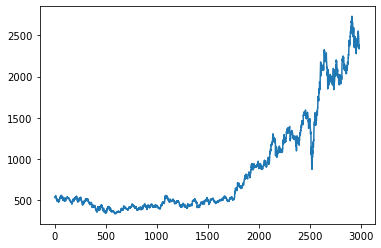

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2977    2478.267007
2978    2478.704009
2979    2478.177510
2980    2477.787510
2981    2477.165510
Name: Close, Length: 2982, dtype: float64

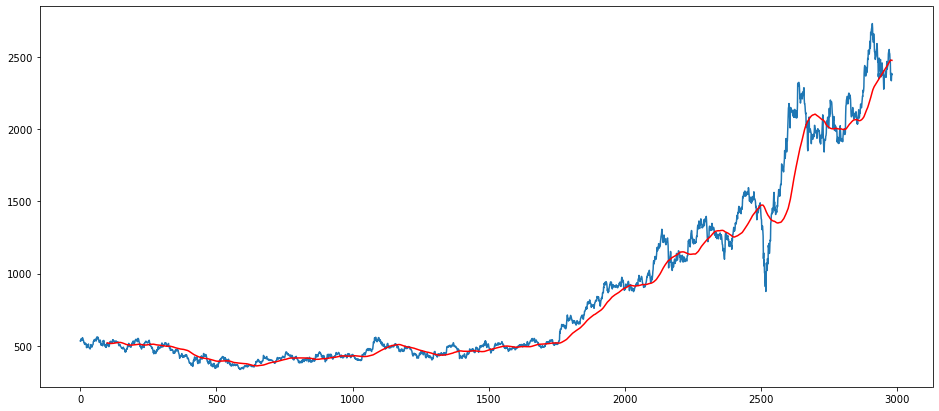

In [8]:
plt.figure(figsize=(16,7))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2977    2280.434753
2978    2282.098504
2979    2283.867504
2980    2286.244755
2981    2288.479254
Name: Close, Length: 2982, dtype: float64

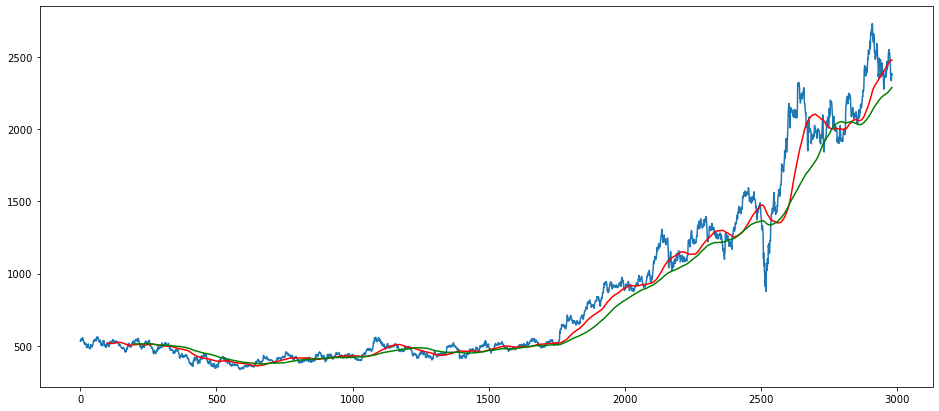

In [10]:
plt.figure(figsize=(16,7))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
 df.shape

(2982, 5)

In [12]:
#split into test and train

x=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])  #data training
y=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))]) #data testing

In [13]:
x.shape

(2087, 1)

In [14]:
y.shape

(895, 1)

In [42]:
#standard scalling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x_t=sc.fit_transform(x) #data training_array
x_t

array([[0.29534862],
       [0.29179914],
       [0.30459218],
       ...,
       [0.98269613],
       [0.99075644],
       [1.        ]])

In [16]:
x_train=[]
y_train=[]

for i in range(100,x_t.shape[0]):
    x_train.append(x_t[i-100:i])
    y_train.append(x_t[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [17]:
import tensorflow

In [18]:
#ML MODEL APPLY

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [43]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 18s 223ms/step - loss: 0.0239
Epoch 2/50
63/63 [==============================] - 14s 218ms/step - loss: 0.0072
Epoch 3/50
63/63 [==============================] - 14s 223ms/step - loss: 0.0059
Epoch 4/50
63/63 [==============================] - 15s 237ms/step - loss: 0.0049
Epoch 5/50
63/63 [==============================] - 15s 238ms/step - loss: 0.0047
Epoch 6/50
63/63 [==============================] - 15s 241ms/step - loss: 0.0046
Epoch 7/50
63/63 [==============================] - 15s 245ms/step - loss: 0.0040
Epoch 8/50
63/63 [==============================] - 16s 247ms/step - loss: 0.0041
Epoch 9/50
63/63 [==============================] - 16s 248ms/step - loss: 0.0037
Epoch 10/50
63/63 [==============================] - 16s 250ms/step - loss: 0.0033
Epoch 11/50
63/63 [==============================] - 15s 246ms/step - loss: 0.0032
Epoch 12/50
63/63 [==============================] - 16s 248ms/step - loss: 0.0032
Epoch 13/50
6

In [46]:
model.save('keras_model.h5')

In [47]:
y.head()

,Close
2087,1006.013977
2088,986.697083
2089,1009.679260
2090,1022.260010
2091,1002.992615


In [48]:
x.tail(100) #we have append these 100 data

,Close
1987,922.555115
1988,962.377625
1989,974.017273
1990,957.276001
1991,956.830200
...,...
2082,973.422913
2083,987.786743
2084,993.086548
2085,998.485352


In [49]:
past_100_days=x.tail(100)

In [50]:
final_df=past_100_days.append(y,ignore_index=True)

In [51]:
final_df.head()

,Close
0,922.555115
1,962.377625
2,974.017273
3,957.276001
4,956.830200


In [52]:
input_data=sc.fit_transform(final_df)

In [53]:
input_data.shape

(995, 1)

In [54]:
input_data

array([[2.59193899e-02],
       [4.73588649e-02],
       [5.36253698e-02],
       [4.46122743e-02],
       [4.43722660e-02],
       [4.36256244e-02],
       [3.61058120e-02],
       [4.19189824e-02],
       [3.26125470e-02],
       [1.15463928e-02],
       [1.03730990e-02],
       [5.01323020e-03],
       [6.23985555e-03],
       [1.16530558e-02],
       [8.07981000e-03],
       [1.74929084e-02],
       [2.71726974e-02],
       [2.82393281e-02],
       [2.05861704e-02],
       [2.36261009e-02],
       [2.04795074e-02],
       [2.48794085e-02],
       [2.22127987e-02],
       [2.74926866e-02],
       [2.98659565e-02],
       [3.61591435e-02],
       [3.83190872e-02],
       [3.50391484e-02],
       [2.20794863e-02],
       [1.50129755e-02],
       [3.75992265e-03],
       [1.53329648e-02],
       [1.62129515e-02],
       [2.53860745e-02],
       [2.62126969e-02],
       [2.47194138e-02],
       [1.55196416e-02],
       [9.25310382e-03],
       [6.82650246e-03],
       [3.78657199e-03],


In [55]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])


In [56]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(895, 100, 1)
(895,)


In [57]:
#making prediction

y_predicted=model.predict(x_test)


In [58]:
y_predicted.shape

(895, 1)

In [59]:
y_predicted

array([[0.0927581 ],
       [0.09521839],
       [0.09696153],
       [0.09807231],
       [0.09889802],
       [0.09946753],
       [0.09966896],
       [0.09919252],
       [0.09775279],
       [0.09512839],
       [0.09193983],
       [0.08869119],
       [0.08594979],
       [0.08415295],
       [0.08316931],
       [0.0829248 ],
       [0.08354019],
       [0.08531992],
       [0.08842865],
       [0.09312657],
       [0.09907143],
       [0.10585694],
       [0.11294652],
       [0.11981128],
       [0.12600803],
       [0.1313647 ],
       [0.13572279],
       [0.13890973],
       [0.14089274],
       [0.14164996],
       [0.14155291],
       [0.14146109],
       [0.1424258 ],
       [0.14474513],
       [0.14811793],
       [0.15207455],
       [0.15629789],
       [0.16040571],
       [0.16434483],
       [0.16803393],
       [0.17127426],
       [0.17372915],
       [0.17540218],
       [0.17627603],
       [0.17642301],
       [0.17642675],
       [0.17694351],
       [0.178

In [60]:
sc.scale_ 

array([0.00053838])

In [61]:
scale_factor= 1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

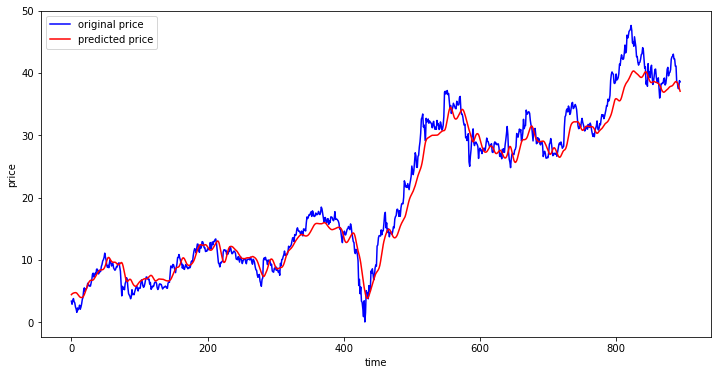

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()